###### download our dataset
#!kaggle datasets download -d blastchar/telco-customer-churn

In [2]:
## lets unzip the file
#!unzip telco-customer-churn.zip 

### Initial data preparation 

In [3]:
## import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

In [4]:
## read the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
## lets check the number of rows in the dataset
len(df)


7043

In [6]:
## lets examine a couple of rows 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
## lets transpose the dataframe to view all columns
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
## lets check the column types of the dataframe
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
## let change the column type of TotalCharges to numeric

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [10]:
## lets normalize the data in our dataframe
## change the column names to lowercase and replace spaces with underscore

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
## lets select string columns and normalize their data
## change the data to lower case and replaces all spaces with underscore

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [12]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [13]:
## lets convert our target variable to numeric

df.churn = (df.churn == 'yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [14]:
## lets divide our dataset for the purposes of training into
## training set 60%
## validation set 20%
## test set 20%
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11)



In [15]:
print(f'Training dataset: {len(df_train)}')
print(f'Testing dataset: {len(df_test)}')
print(f'Validation dataset: {len(df_valid)}')


Training dataset: 4225
Testing dataset: 1409
Validation dataset: 1409


In [16]:
## lets select the target column from the dataset
y_train = df_train.churn.values
y_valid = df_valid.churn.values
y_test = df_test.churn.values 

In [17]:
## lets deletes the target column from the dataset
del df_train['churn']
del df_valid['churn']
del df_test['churn']

### Exploratory data analysis

In [18]:
## lets check for missing values in the dataset
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [19]:
## lets check the distribution of the values in the target variables
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [20]:
## check the proportion of churned users against all customers
1521 / 5634

0.26996805111821087

In [21]:
## lets use the mean method to calculate the churn rate
global_churn_rate = df_train_full.churn.mean()
round(global_churn_rate, 2)

0.27

In [22]:
## lets create a list of categorical and numerical varialbes in the dataset

categorical_var = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
                 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
                 'deviceprotection','techsupport','streamingtv', 'streamingmovies', 
                 'contract', 'paperlessbilling', 'paymentmethod']

numerical_var = ['tenure', 'totalcharges', 'monthlycharges']

In [23]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [24]:
## let check how many unique values each categorical variables has
df_train_full[categorical_var].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature importance

In [25]:
## let calculate the churn rate for the categorical variables 
## lets start with the gender cat variable

female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()

print(f'Female churn rate: {round(female_mean, 2)}')
print(f'Male churn rate: {round(male_mean, 2)}')


Female churn rate: 0.28
Male churn rate: 0.26


In [26]:
## lets check that of the partner cat variable
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()

partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()

print(f'No partner churn rate: {round(partner_no, 2)}')
print(f'Yes partner churn rate: {round(partner_yes, 2)}')

No partner churn rate: 0.33
Yes partner churn rate: 0.21


### Risk Ratio
calculating the risk ration for the entire group.

In [27]:
global_mean = df_train_full.churn.mean()



In [28]:
## calculate the avg(churn)
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
## cal the diff b/n the group churn rate and global churn rate
df_group['diff'] = df_group['mean'] - global_mean
## cal the risk of churning 
df_group['risk'] = df_group['mean'] / global_mean

In [29]:
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [30]:
## calculating the risk ration for all cat var
from IPython.display import display

## lets through all the cat var
for col in categorical_var:
    ## lets perform groupby for each cat var
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rate'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,rate
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,rate
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


### Mutual Information


In [31]:
## lets import our library
from sklearn.metrics import mutual_info_score

##lets creates a stand-aline function for calculating mutual info
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

## let apply the function to each column of the dataset
df_mi = df_train_full[categorical_var].apply(calculate_mi)
## let apply the function to each cat column of the dataset
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581


In [32]:
### Correlation Coefficient 

In [33]:
df_train_full[numerical_var].corrwith(df_train_full.churn)

tenure           -0.351885
totalcharges     -0.196353
monthlycharges    0.196805
dtype: float64

### Feature Engineering 

In [34]:
## 
df_train = df_train[categorical_var + numerical_var]

In [35]:
## lets convert our data into a dictionary
train_dict_1 = df_train.to_dict(orient='records')

/tmp/ipykernel_4248/3877557660.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict_1 = df_train.to_dict(orient='records')


In [36]:
train_dict_2 = df_train.to_dict(orient='dict')

/tmp/ipykernel_4248/2188026823.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict_2 = df_train.to_dict(orient='dict')


In [37]:
train_dict_2

{'gender': {5323: 'female',
  3026: 'female',
  1860: 'male',
  5251: 'female',
  2642: 'female',
  6543: 'female',
  4015: 'female',
  4596: 'male',
  5830: 'male',
  5790: 'female',
  5525: 'female',
  1241: 'male',
  1586: 'female',
  5173: 'male',
  1752: 'male',
  5234: 'female',
  5360: 'male',
  4611: 'female',
  3619: 'female',
  5293: 'male',
  5118: 'female',
  5356: 'female',
  3422: 'female',
  493: 'male',
  4441: 'male',
  2609: 'male',
  3572: 'female',
  1898: 'female',
  838: 'male',
  2586: 'female',
  1248: 'female',
  909: 'female',
  3940: 'male',
  4843: 'male',
  5668: 'female',
  4401: 'female',
  1776: 'male',
  2030: 'male',
  3804: 'male',
  3401: 'female',
  5815: 'male',
  3870: 'female',
  4560: 'male',
  4752: 'male',
  4704: 'male',
  4617: 'female',
  240: 'female',
  4216: 'male',
  2415: 'female',
  5924: 'male',
  4629: 'female',
  6133: 'male',
  1279: 'male',
  6290: 'female',
  2971: 'female',
  336: 'female',
  4750: 'male',
  3784: 'male',
  172

In [38]:
##
from sklearn.feature_extraction import DictVectorizer

dict_vec = DictVectorizer(sparse=False)
dict_vec.fit(train_dict_1)

## convert
X_train = dict_vec.transform(train_dict_1)

## Machine learning for classification
### Logistic regression
#### Training a logistic regression

In [39]:
## lets import our model
from sklearn.linear_model import LogisticRegression

## lets create an instance of LogReg
clf = LogisticRegression(solver='liblinear', random_state=1)
clf.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

### Lets check how well our model performed. 
For us to check our well our model performed, we have to use <br>
the validation data to obtain the probability of churn for each <br>
customer in the validation dataset. 

In [40]:
df_valid = df_valid[categorical_var + numerical_var]

## convert it to a dictionary list
valid_dict = df_valid.to_dict(orient='records')
## lets transform
X_valid = dict_vec.transform(valid_dict)

/tmp/ipykernel_4248/2493149807.py:4: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  valid_dict = df_valid.to_dict(orient='records')


In [41]:
## lets make our predictions
y_valid_pred = clf.predict_proba(X_valid)[:,1]

In [42]:
## lets convert our predictions (soft) into a hard predictions
## by setting a threshold value for churn

churn = y_valid_pred >= 0.5 


In [43]:
## lets cal the accuracy of our model 
## by comparing it predictions to our actual value

(y_valid == churn).mean()

0.7991483321504613

### Using the model 

In [44]:
## lets get the customer data
customer = {
'customerid': '8879-zkjof',
'gender': 'female',
'seniorcitizen': 0,
'partner': 'no',
'dependents': 'no',
'tenure': 41,
'phoneservice': 'yes',
'multiplelines': 'no',
'internetservice': 'dsl',
'onlinesecurity': 'yes',
'onlinebackup': 'no',
'deviceprotection': 'yes',
'techsupport': 'yes',
'streamingtv': 'yes',
'streamingmovies': 'yes',
'contract': 'one_year',
'paperlessbilling': 'yes',
'paymentmethod': 'bank_transfer_(automatic)',
'monthlycharges': 79.85,
'totalcharges': 3320.75,
}

In [45]:
## lets convert this dictionary to a matrix 
X_test = dict_vec.transform([customer])
clf.predict_proba(X_test)[0, 1]

0.05899309891013804

In [46]:
customer = {
'gender': 'female',
'seniorcitizen': 1,
'partner': 'no',
'dependents': 'no',
'phoneservice': 'yes',
'multiplelines': 'yes',
'internetservice': 'fiber_optic',
'onlinesecurity': 'no',
'onlinebackup': 'no',
'deviceprotection': 'no',
'techsupport': 'no',
'streamingtv': 'yes',
'streamingmovies': 'no',
'contract': 'month-to-month',
'paperlessbilling': 'yes',
'paymentmethod': 'electronic_check',
'tenure': 1,
'monthlycharges': 85.7,
'totalcharges': 85.7
}


In [47]:
X_test = dict_vec.transform([customer])
clf.predict_proba(X_test)[0,1]

0.827329098964807

### Evaluation Metrics For Classification 
- Looking at accuracy as a way of evaluating binary classification models and its limitations 
- Using the confusion table to finding where our model makes mistakes.
- Using the confusion table to also derive other metrics such as precision and recall 
- Using ROC (receiver operating characteristics and AUC (area under the ROC curve) to further understand the performance of a binary classification model. 
- Cross-validating a model to make sure it behabes optimally 
- Tuning the parameters of a model to achieve the best predictive performance. 

### Question
#### How good is the accuracy we computed and what does it means in terms of the quality of the model? 

In [48]:
## lets compute the accuracy over different threshold 
## and check the one which gives us the best accuracy 
## using scikit-learns accuracy score
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 11)

## lets compute the predictions on the validation set
y_valid_pred = clf.predict_proba(X_valid)[:, 1]

for t in thresholds:
    churn = y_valid_pred >= t
    acc = accuracy_score(y_valid, churn)
    print(f'Threshold and Accuracy: {round(t, 2)} -> {round(acc,2)}')

Threshold and Accuracy: 0.0 -> 0.26
Threshold and Accuracy: 0.1 -> 0.59
Threshold and Accuracy: 0.2 -> 0.69
Threshold and Accuracy: 0.3 -> 0.75
Threshold and Accuracy: 0.4 -> 0.78
Threshold and Accuracy: 0.5 -> 0.8
Threshold and Accuracy: 0.6 -> 0.79
Threshold and Accuracy: 0.7 -> 0.77
Threshold and Accuracy: 0.8 -> 0.74
Threshold and Accuracy: 0.9 -> 0.74
Threshold and Accuracy: 1.0 -> 0.74


In [49]:
## lets create a visual plot of accuracy against thresholds
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0,1,21)
list_acc_score = []

for t in thresholds:
    churn = y_valid_pred >= t 
    acc = accuracy_score(y_valid, churn)
    list_acc_score.append(acc)

In [50]:
#list_acc_score

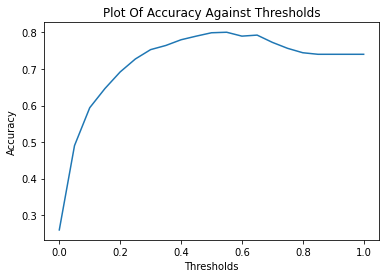

In [51]:
plt.figure(figsize=(6,4))


plt.plot(thresholds, list_acc_score)

plt.xlabel('Thresholds')
plt.ylabel('Accuracy')
plt.title('Plot Of Accuracy Against Thresholds')

plt.show()

## Confusion Table 
Concisely presents all possible outcome of the models predictions. 
These are:
   - True negative (TN): We predicted False ('no churn'), is the actual lable is Fasle ('no churn')
   - True positive (TP): We predicted True ('churn'), and the actual lable is True ('churn') 
   - False negative (FN): We predicted False, but the actual lable is True 
   - False positive (FP): We predicted True, and the actual lable is False. 

### Calculating the confusion table 
To calculate the confusion table, we need to do these steps:
- First, the predictions split the dataset into two parts: the part for which we predict True (“churn”) and the part for which we predict False (“no churn”).
- At the same time, the target variable splits this dataset into two different parts:
the customers who actually churned (“1” in y_val) and the customers who
didn’t (“0” in y_val).
- When we combine these splits, we get four groups of customers, which are
exactly the four different outcomes from the confusion table

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## lets generate predictions from our model 
## lets compute the predictions on the validation set
#y_valid_pred = clf.predict_proba(X_valid)[:, 1]
y_valid_pred = clf.predict(X_valid)

conf_matrix = confusion_matrix(y_valid, y_valid_pred)

<Figure size 576x288 with 0 Axes>

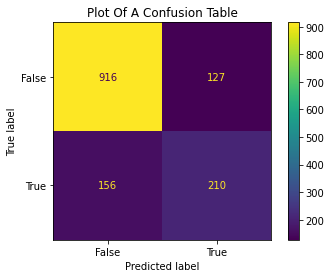

In [71]:
plt.figure(figsize=(8,4))

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[False, True])
cm_display.plot()

plt.title('Plot Of A Confusion Table')
plt.show()

### Precision and recall 
Precision and Recal helps us to understand the quality of the model when dealing with an imbalance class. 
- The Precision of a model tells us how many of the positive predictions turned out to be true. It's the fraction of correctly predicted positive examples. 

- Recall is the fraction of correctly classified possitve examples among all positives examples. 

Why Precision and Recall is a good evaluation of metric for an imbalance dataset is because they don't take true negatives into account. 

Hence the Precision helps us understand how many people received a promotional message by mistake. The better the precision, the fewer false positvies we have

Recall helps us understand how many of the churning customers we failed to find. The better the recall, the fewer false negatives we have. 

In [74]:
from sklearn.metrics import precision_score, recall_score

precision_acc = precision_score(y_valid, y_valid_pred)

recall_acc = recall_score(y_valid, y_valid_pred)

print(f'Precision Accuracy: {precision_acc}')
print(f'Recall Accuracy: {recall_acc}')

Precision Accuracy: 0.6231454005934718
Recall Accuracy: 0.5737704918032787
